In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
from tqdm import tqdm
import time
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss,jaccard_score,roc_auc_score,classification_report,confusion_matrix
from torch.utils.data import Dataset, DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **Dataset Link:** https://github.com/omar-sharif03/BAD-Bangla-Aggressive-Text-Dataset/tree/main
* **Paper Link:** https://www.sciencedirect.com/science/article/abs/pii/S0925231221018567

# **Train Dataset Loading**

In [ ]:
# Read the Excel file into a DataFrame
train_data = pd.read_excel("/content/drive/MyDrive/train-multi.xlsx")

# Drop the 'Unnamed: 0' column
train_data.drop('Unnamed: 0', axis=1, inplace=True)

# Display the DataFrame after removing the 'Unnamed: 0' column
train_data.head()

,cleaned,Class,Label
0,বর্তমানে শেখ পরিবার মানেই আলাদিনের চ্যাড়াগ কি ...,PoAG,1
1,মাগি আগে কথা বলা শেখ তার পর ভিডিও বানাইস,VeAG,2
2,তোর পুটকি দিয়া নল ঢুকাইয়া মুখ দিয়া গুলি করুম,VeAG,2
3,মাদারচোদ তো নিজে কইতাছে যে সে পাগল চোদা,VeAG,2
4,ওরা কোরান নিয়ে যে দাবি করে পুরোটাই ভন্ডামি আর...,ReAG,0


In [ ]:
label_counts = train_data['Label'].value_counts()
label_counts

0    1794
1    1655
2    1629
3     368
Name: Label, dtype: int64

In [ ]:
class_counts = train_data['Class'].value_counts()
class_counts

ReAG    1794
PoAG    1655
VeAG    1629
GeAG     368
Name: Class, dtype: int64

# **Test Dataset Loading**

In [ ]:
# Read the Excel file into a DataFrame
test_data = pd.read_excel("/content/drive/MyDrive/test-multi.xlsx")

# Drop the 'Unnamed: 0' column
test_data.drop('Unnamed: 0', axis=1, inplace=True)

# Display the DataFrame after removing the 'Unnamed: 0' column
test_data.head()

,cleaned,Class,Label
0,এটা মেয়ে নাকি হিজড়া কিছুইত বুজলাম না,GeAG,3
1,পৃথিবীতে সর্বপ্রথম কোন দেবতা পুতনা রাক্ষসীর স্...,ReAG,0
2,তোর কমেন্টে পাবলিক গালি ছাড়া ভাল কিছু লিখবে না...,VeAG,2
3,তাহলে অসুখ করলে ডক্টর না দেখিয়ে আল্লার ইচ্ছে ব...,ReAG,0
4,ইন্ডিয়ার মাদারচোদের বাচ্চা ভালো হয়ে যা,VeAG,2


In [ ]:
label_counts = test_data['Label'].value_counts()
label_counts

2    220
0    213
1    201
3     46
Name: Label, dtype: int64

In [ ]:
class_counts = test_data['Class'].value_counts()
class_counts

VeAG    220
ReAG    213
PoAG    201
GeAG     46
Name: Class, dtype: int64

# **Validation Dataset Loading**

In [ ]:
# Read the Excel file into a DataFrame
val_data = pd.read_excel("/content/drive/MyDrive/val-multi.xlsx")

# Drop the 'Unnamed: 0' column
val_data.drop('Unnamed: 0', axis=1, inplace=True)

# Display the DataFrame after removing the 'Unnamed: 0' column
val_data.head()

,cleaned,Class,Label
0,আমরা নিঃসন্দেহে পরিস্কার ভাবে বলতে পারি হিন্দু...,ReAG,0
1,তার মতো কুলাঙ্গার আর না আসলেই ভালো সে তার ক্ষম...,PoAG,1
2,জিয়া নিজে জারজ না আর কোন জারজ বানাইও নিতোদের ন...,PoAG,1
3,তোমাদের কোরআন তো মানুষ হত্যা করতে বলা হচ্ছে এট...,ReAG,0
4,বাংলাদেশের জনগন আওয়ামী লীগ নামক জানোয়ারদের থেক...,PoAG,1


In [ ]:
label_counts = val_data['Label'].value_counts()
label_counts

1    229
0    210
2    194
3     48
Name: Label, dtype: int64

In [ ]:
class_counts = val_data['Class'].value_counts()
class_counts

PoAG    229
ReAG    210
VeAG    194
GeAG     48
Name: Class, dtype: int64

# **Visualization of Label Distribution in Train Dataset**
* **0 - ReAG (religious aggressive)**    
* **1 - PoAG (political aggressive)**  
* **2 - VeAG (verbal aggressive)**
* **3 - GeAG (gendered aggressive)**

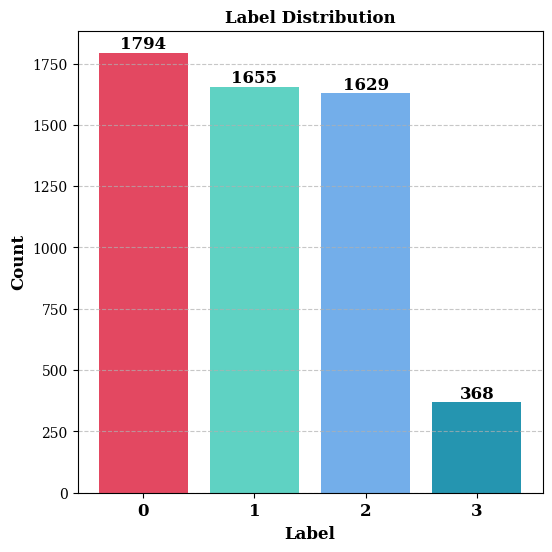

In [ ]:
label_counts = train_data['Label'].value_counts()

# Define custom colors for the bars
custom_colors = ['#e34861' , '#5fd2c3', '#73aeea', '#2595b0']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(6, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Label Distribution', fontdict=font)
plt.xlabel('Label', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(label_counts.index, label_counts.index, fontdict=font)
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()


# **Visualization of Class Distribution in Train Dataset**

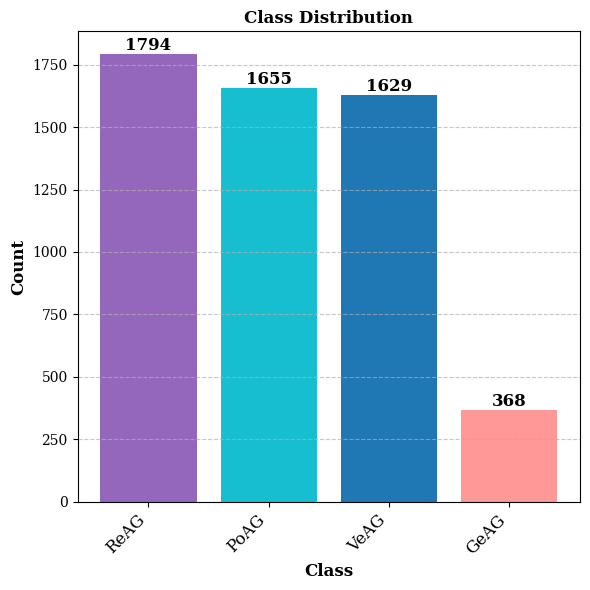

In [ ]:
label_counts = train_data['Class'].value_counts()

# Define custom colors for the bars
custom_colors = ['#9467bd', '#17becf', '#1f77b4', '#ff9896']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(6, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Class Distribution', fontdict=font)
plt.xlabel('Class', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Rotate x-axis labels (xticks rotation)
plt.xticks(rotation=45, fontname='Serif', fontsize=12, ha='right')

# Set custom font for y-axis ticks
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.tight_layout()
plt.show()


# **Visualization of Cleaned Length Distribution in Train Dataset**

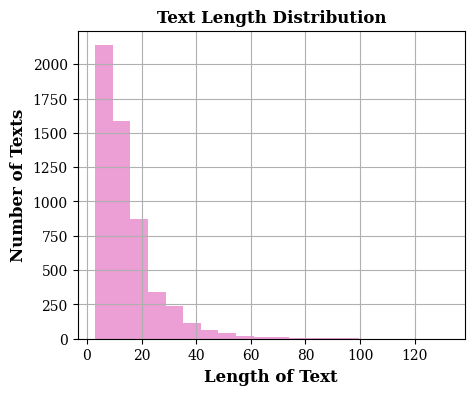

In [ ]:
# Visualize content length distribution
content_lengths = train_data['cleaned'].apply(lambda x: len(x.split()))
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
custom_colors = ['#e377c2']
plt.figure(figsize=(5, 4))
plt.hist(content_lengths, bins=20, color=custom_colors, alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Text Length Distribution',fontdict=font)
plt.xlabel('Length of Text',fontdict=font)
plt.ylabel('Number of Texts',fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)
plt.grid(True)
plt.show()

# **Checking if there is any null value in the train dataset**

In [ ]:
# Check for null values in 'Cleaned', 'Class', and 'Label' columns
null_cleaned = train_data['cleaned'].isnull().sum()
null_class = train_data['Class'].isnull().sum()
null_label = train_data['Label'].isnull().sum()


print(f"Null values in 'Cleaned': {null_cleaned}")
print(f"Null values in 'Class': {null_class}")
print(f"Null values in 'Label': {null_label}")


Null values in 'Cleaned': 0
Null values in 'Class': 0
Null values in 'Label': 0


# **Visualization of Label Distribution in Test Dataset**
* **0 - ReAG (religious aggressive)**
* **1 - PoAG (political aggressive)**
* **2 - VeAG (verbal aggressive)**
* **3 - GeAG (gendered aggressive)**

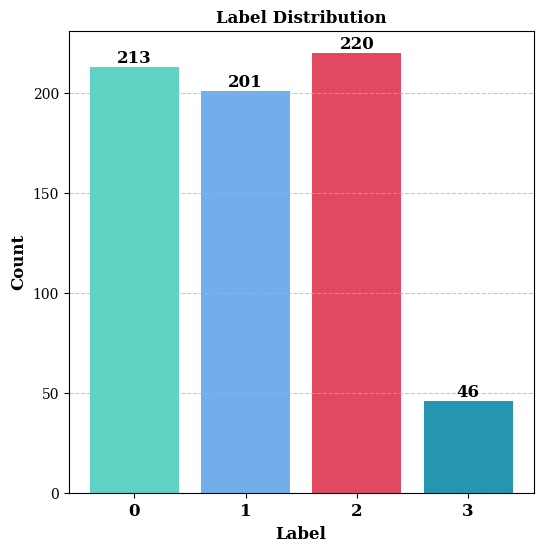

In [ ]:
label_counts = test_data['Label'].value_counts()

# Define custom colors for the bars
custom_colors = ['#e34861' , '#5fd2c3', '#73aeea', '#2595b0']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(6, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Label Distribution', fontdict=font)
plt.xlabel('Label', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(label_counts.index, label_counts.index, fontdict=font)
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()


# **Visualization of Class Distribution in Test Dataset**

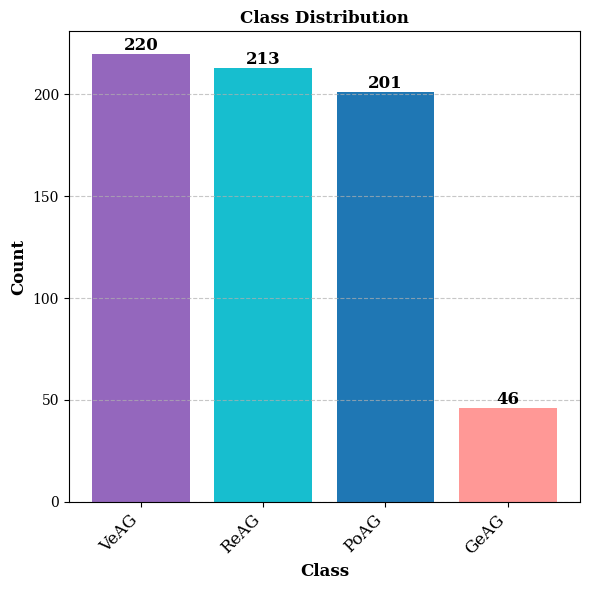

In [ ]:
label_counts = test_data['Class'].value_counts()

# Define custom colors for the bars
custom_colors = ['#9467bd', '#17becf', '#1f77b4', '#ff9896']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(6, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Class Distribution', fontdict=font)
plt.xlabel('Class', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Rotate x-axis labels (xticks rotation)
plt.xticks(rotation=45, fontname='Serif', fontsize=12, ha='right')

# Set custom font for y-axis ticks
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.tight_layout()
plt.show()


# **Visualization of Cleaned Length Distribution in Test Dataset**

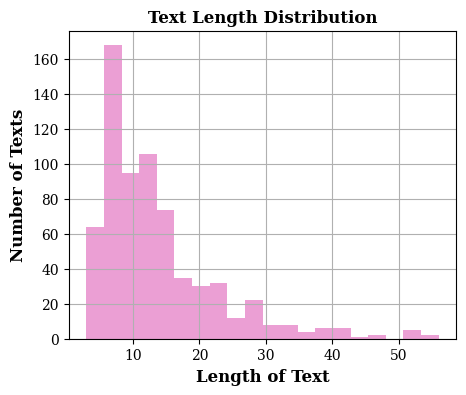

In [ ]:
# Visualize content length distribution
content_lengths = test_data['cleaned'].apply(lambda x: len(x.split()))
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
custom_colors = ['#e377c2']
plt.figure(figsize=(5, 4))
plt.hist(content_lengths, bins=20, color=custom_colors, alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Text Length Distribution',fontdict=font)
plt.xlabel('Length of Text',fontdict=font)
plt.ylabel('Number of Texts',fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)
plt.grid(True)
plt.show()

# **Checking if there is any null value in the test dataset**

In [ ]:
# Check for null values in 'Cleaned', 'Class', and 'Label' columns
null_cleaned = test_data['cleaned'].isnull().sum()
null_class = test_data['Class'].isnull().sum()
null_label = test_data['Label'].isnull().sum()


print(f"Null values in 'Cleaned': {null_cleaned}")
print(f"Null values in 'Class': {null_class}")
print(f"Null values in 'Label': {null_label}")


Null values in 'Cleaned': 0
Null values in 'Class': 0
Null values in 'Label': 0


# **Visualization of Label Distribution in Validation Dataset**
* **0 - ReAG (religious aggressive)**
* **1 - PoAG (political aggressive)**
* **2 - VeAG (verbal aggressive)**
* **3 - GeAG (gendered aggressive)**

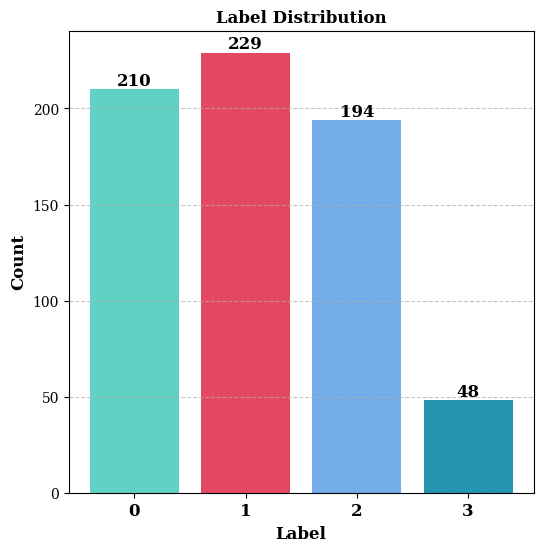

In [ ]:
label_counts = val_data['Label'].value_counts()

# Define custom colors for the bars
custom_colors = ['#e34861' , '#5fd2c3', '#73aeea', '#2595b0']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(6, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Label Distribution', fontdict=font)
plt.xlabel('Label', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(label_counts.index, label_counts.index, fontdict=font)
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()


# **Visualization of Class Distribution in Validation Dataset**

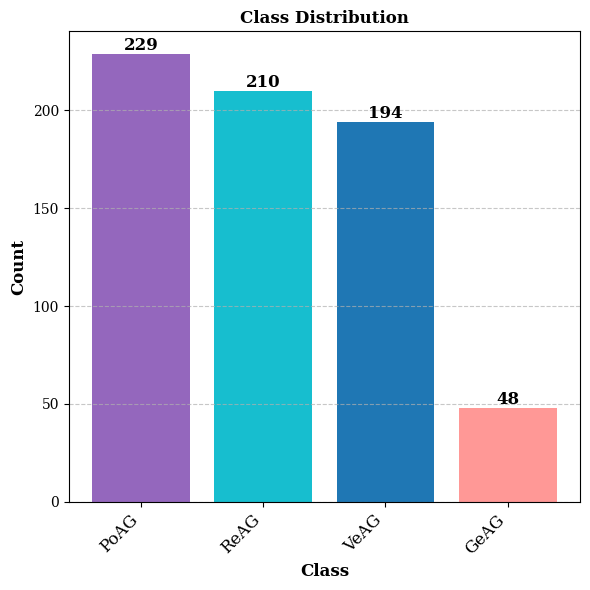

In [ ]:
label_counts = val_data['Class'].value_counts()

# Define custom colors for the bars
custom_colors = ['#9467bd', '#17becf', '#1f77b4', '#ff9896']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(6, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Class Distribution', fontdict=font)
plt.xlabel('Class', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Rotate x-axis labels (xticks rotation)
plt.xticks(rotation=45, fontname='Serif', fontsize=12, ha='right')

# Set custom font for y-axis ticks
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.tight_layout()
plt.show()


# **Checking if there is any null value in the validation dataset**

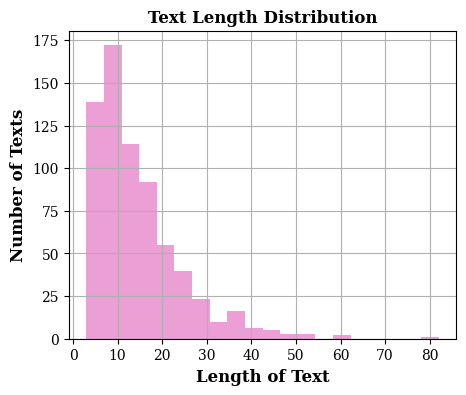

In [ ]:
# Visualize content length distribution
content_lengths = val_data['cleaned'].apply(lambda x: len(x.split()))
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
custom_colors = ['#e377c2']
plt.figure(figsize=(5, 4))
plt.hist(content_lengths, bins=20, color=custom_colors, alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Text Length Distribution',fontdict=font)
plt.xlabel('Length of Text',fontdict=font)
plt.ylabel('Number of Texts',fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)
plt.grid(True)
plt.show()

# **Checking if there is any null value in the validation dataset**

In [ ]:
# Check for null values in 'Cleaned', 'Class', and 'Label' columns
null_cleaned = val_data['cleaned'].isnull().sum()
null_class = val_data['Class'].isnull().sum()
null_label = val_data['Label'].isnull().sum()


print(f"Null values in 'Cleaned': {null_cleaned}")
print(f"Null values in 'Class': {null_class}")
print(f"Null values in 'Label': {null_label}")


Null values in 'Cleaned': 0
Null values in 'Class': 0
Null values in 'Label': 0


In [ ]:
print(f"Length of train dataset: {len(train_data)}")
print(f"Length of test dataset: {len(test_data)}")
print(f"Length of validation dataset: {len(val_data)}")

Length of train dataset: 5446
Length of test dataset: 680
Length of validation dataset: 681


In [ ]:
'''
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the categories
encoded_labels = label_encoder.fit_transform(train_data['Class'])

# Display the encoded labels
print("Encoded labels:", encoded_labels)

# Mapping of encoded labels to original categories
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print("Decoded labels:", decoded_labels)
'''

'\nfrom sklearn.preprocessing import LabelEncoder\n\n# Create an instance of LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Fit label encoder and transform the categories\nencoded_labels = label_encoder.fit_transform(train_data[\'Class\'])\n\n# Display the encoded labels\nprint("Encoded labels:", encoded_labels)\n\n# Mapping of encoded labels to original categories\ndecoded_labels = label_encoder.inverse_transform(encoded_labels)\nprint("Decoded labels:", decoded_labels)\n'

In [ ]:
'''
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the categories
encoded_labels = label_encoder.fit_transform(train_data['Class'])

# Assign encoded labels to a new column 'Encoded Label'
train_data['Encoded Label'] = encoded_labels

# Display the DataFrame with the new 'Encoded Label' column
train_data.head()
'''

"\n# Create an instance of LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Fit label encoder and transform the categories\nencoded_labels = label_encoder.fit_transform(train_data['Class'])\n\n# Assign encoded labels to a new column 'Encoded Label'\ntrain_data['Encoded Label'] = encoded_labels\n\n# Display the DataFrame with the new 'Encoded Label' column\ntrain_data.head()\n"

# **Custom Dataset Class**

In [ ]:
class BanglaAggressiveTextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=250):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        content = self.data.iloc[idx]['cleaned']
        label = self.data.iloc[idx]['Label']

        inputs = self.tokenizer.encode_plus(
            content,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long) #torch.nn.CrossEntropyLoss expects the target labels to be torch.LongTensor.
        }

In [ ]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-2028wv71
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-2028wv71
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6859 sha256=93491da4e8360f54a1ea0452314c641cfaad3bf83b1d8989ca7419072d13616a
  Stored in directory: /tmp/pip-ephem-wheel-cache-bzqs40rw/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186460 sha256=02492939ea70901e8383ecbdf1855124bc38b0

In [ ]:
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.4 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.8 MB/s eta 0:00:00


# **BanglaBERT model and its tokenizer**

* Option 1: Fine-tuning the model
* Option 2: Adjusting the final layer

# **Option 1**

In [ ]:
# Model loading
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer
num_classes = 4  #number of classes in our dataset

model_name = "csebuetnlp/banglabert"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)
tokenizer = AutoTokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

# **Option 2**

In [ ]:
'''
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer
import torch.nn as nn

num_classes = 4 #number of classes in our dataset

model_name = "csebuetnlp/banglabert"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Replace the final classification layer with a new one for 4 classes
model.classifier = nn.Linear(model.config.hidden_size, num_classes)
'''

'\nfrom transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW\nfrom normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer\nimport torch.nn as nn\n\nnum_classes = 4 #number of classes in our dataset\n\nmodel_name = "csebuetnlp/banglabert"\nmodel = AutoModelForSequenceClassification.from_pretrained(model_name)\ntokenizer = AutoTokenizer.from_pretrained(model_name)\n# Replace the final classification layer with a new one for 4 classes\nmodel.classifier = nn.Linear(model.config.hidden_size, num_classes)\n'

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

# **Apply normalization to the datasets**

In [ ]:
# Apply normalization to the datasets
train_data['cleaned'] = train_data['cleaned'].apply(normalize)
test_data['cleaned'] = test_data['cleaned'].apply(normalize)
val_data['cleaned'] = val_data['cleaned'].apply(normalize)

# **Custom dataset and dataloader**

In [ ]:
# Define custom datasets
train_dataset = BanglaAggressiveTextDataset(train_data, tokenizer)
val_dataset = BanglaAggressiveTextDataset(val_data, tokenizer)
test_dataset = BanglaAggressiveTextDataset(test_data, tokenizer)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# **Train Dataset Encoding Printing**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in train_loader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['label'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([    2,  5390, 19441,  3442, 20295,   410,  1711, 27149,  1409,  4460,
            3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    

# **Test Dataset Encoding Printing**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in test_loader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['label'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([    2,  1319,  1233,  1708,  7480,  1154,  2068,   431, 13044,   979,
          795,     3,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    

# **Validation Dataset Encoding Printing**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in val_loader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['label'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([    2,  1062, 12018, 10869,  1506,  1385,  1787,  3527,  1784,   990,
         4148,   219,  1757,  2182,   423,  1784,  3050,     3,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    

# **Train Dataset Decoding Printing**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

# Iterate through the DataLoader
for batch in train_loader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['label'][0]

    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = labels.item()  # Assuming labels are single integers
    print("Label:", decoded_labels)

    # Break out of the loop after processing the first sample from the first batch
    break


Decoded Input Text: হালারপুতে মাইয়াগো ব্লাউজ পইরা আইছে তাও আবার লাল রংয়ের
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
Label: 3


# **Test Dataset Decoding Printing**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

# Iterate through the DataLoader
for batch in test_loader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['label'][0]

    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = labels.item()  # Assuming labels are single integers
    print("Label:", decoded_labels)

    # Break out of the loop after processing the first sample from the first batch
    break


Decoded Input Text: এটা মেয়ে নাকি হিজড়া কিছুইত বুজলাম না
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
Label: 3


# **Validation Dataset Decoding Printing**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

# Iterate through the DataLoader
for batch in val_loader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['label'][0]

    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = labels.item()  # Assuming labels are single integers
    print("Label:", decoded_labels)

    # Break out of the loop after processing the first sample from the first batch
    break


Decoded Input Text: আমরা নিঃসন্দেহে পরিস্কার ভাবে বলতে পারি হিন্দু ধর্ম একটি মিথ্যা ও বানোয়াট ধর্মমত
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
Label: 0


# **Optimizer and Loss Function**

In [ ]:
import torch.optim as optim
learning_rate = 2e-5
# Define the optimizer
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# **Training the model**

In [ ]:
# Training loop
num_epochs = 3
gradient_accumulation_steps = 4  # Accumulate gradients over 4 steps

for epoch in range(num_epochs):
    start_time = time.time()  # Start time of the epoch
    model.train()
    total_loss = 0
    optimizer.zero_grad()

    # Wrap train_loader with tqdm for progress bar
    for batch_idx, batch in enumerate(tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Logits directly from the model output

        loss = criterion(logits, labels)
        total_loss += loss.item()

        loss = loss / gradient_accumulation_steps
        loss.backward()

        if (batch_idx + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Average training loss: {avg_train_loss:.4f}')

    # Validation
    model.eval()
    val_preds = []
    val_labels = []

    # Wrap val_loader with tqdm for progress bar
    for batch in tqdm(val_loader, desc=f'Validation', leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Logits directly from the model output

        _, predicted = torch.max(logits, 1)

        val_preds.extend(predicted.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f'Epoch {epoch + 1}/{num_epochs} - Validation Accuracy: {val_accuracy:.4f}')

    # Calculate and print epoch training time
    epoch_time = time.time() - start_time
    print(f"Epoch {epoch + 1} completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")

Epoch 1/3 - Average training loss: 0.8654


Epoch 1/3 - Validation Accuracy: 0.8825
Epoch 1 completed in 3m 45s


Epoch 2/3 - Average training loss: 0.3390


Epoch 2/3 - Validation Accuracy: 0.9134
Epoch 2 completed in 3m 55s


Epoch 3/3 - Average training loss: 0.2215


Epoch 3/3 - Validation Accuracy: 0.9104
Epoch 3 completed in 3m 54s


# **Testing the model**

In [ ]:
test_preds = []
test_labels = []
test_probs = []  # Store predicted probabilities

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Testing'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Assuming our model directly outputs logits
        probabilities = torch.softmax(outputs.logits, dim=1)  # Softmax to get probabilities
        _, predicted = torch.max(outputs.logits, 1)

        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        test_probs.extend(probabilities.cpu().numpy())  # Append predicted probabilities

test_accuracy = accuracy_score(test_labels, test_preds)
test_precision = precision_score(test_labels, test_preds, average='macro')
test_recall = recall_score(test_labels, test_preds, average='macro')
test_f1 = f1_score(test_labels, test_preds, average='macro')
test_jaccard_score = jaccard_score(test_labels, test_preds, average='macro')
test_log_loss = log_loss(test_labels, test_probs)


Testing: 100%|██████████| 43/43 [00:10<00:00,  3.96it/s]


In [ ]:
print(test_preds)
print(test_labels)

[3, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 3, 2, 0, 2, 3, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 3, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 3, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 0, 3, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 3, 0, 0, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 3, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 3, 1, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 3, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 3, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 3, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 

# **Printing the evaluation metric results**

In [ ]:
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print(f'Test Jaccard Score: {test_jaccard_score}')
print(f'Log Loss: {test_log_loss}')

Test Accuracy: 0.9205882352941176
Test Precision: 0.8972562528434582
Test Recall: 0.8471694996043553
Test F1 Score: 0.8656354343296052
Test Jaccard Score: 0.7827330544267892
Log Loss: 0.25927395061510145


In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Convert labels to one-hot encoded format
label_binarizer = LabelBinarizer()
test_labels_one_hot = label_binarizer.fit_transform(test_labels)

# Reshape the one-hot encoded labels
num_classes = len(label_binarizer.classes_)
test_labels_one_hot = test_labels_one_hot.reshape(-1, num_classes)

# Creating a 2D array for test_preds
num_samples = len(test_preds)
num_classes = len(label_binarizer.classes_)
formatted_preds = [[0] * num_classes for _ in range(num_samples)]
for i, pred in enumerate(test_preds):
    formatted_preds[i][pred] = 1

# Calculate ROC AUC score for multiclass classification
test_roc_auc_score = roc_auc_score(test_labels_one_hot, formatted_preds, average='macro', multi_class='ovo')
print("Test ROC AUC Score:", test_roc_auc_score)

Test ROC AUC Score: 0.909514972336207


# **Classification Report**

In [ ]:
# Mapping numeric labels to category names
label_map = {0: 'ReAG', 1: 'PoAG', 2: 'VeAG', 3: 'GeAG'}

# Convert numeric predictions to label names
predicted_labels = [label_map[pred] for pred in test_preds]
true_labels = [label_map[label] for label in test_labels]

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        GeAG       0.81      0.54      0.65        46
        PoAG       0.95      0.97      0.96       201
        ReAG       0.94      0.94      0.94       213
        VeAG       0.89      0.94      0.91       220

    accuracy                           0.92       680
   macro avg       0.90      0.85      0.87       680
weighted avg       0.92      0.92      0.92       680



# **Confusion Matrix of Bangla Fake News**

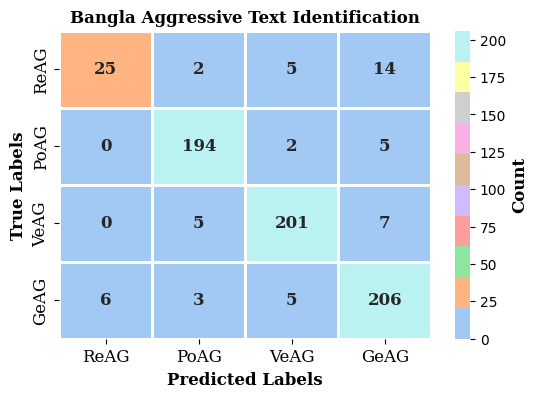

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
# Define the custom palette
custom_palette = sns.color_palette("pastel")# Modify the number based on number of classes in the dataset
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, linewidths=2, linecolor='white',
                      xticklabels=['ReAG', 'PoAG', 'VeAG','GeAG'], yticklabels=['ReAG', 'PoAG', 'VeAG','GeAG'],annot_kws={"family": "Serif",'weight': 'bold', 'size': 12})

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font)
heatmap.set_ylabel('True Labels', fontdict=font)
heatmap.set_title('Bangla Aggressive Text Identification', fontdict=font)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', fontdict=font)
cbar.ax.tick_params(labelsize=10)

plt.show()


# **Store predicted results to a csv file**

In [ ]:
# Combine the lists into a DataFrame
data = {'Content': test_data['cleaned'],
        'True_Labels': test_data['Label'],
        'Predicted_Labels': test_preds}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('banglabert_predicted_results.csv', index=False)

# **save model, tokenizer, and classifier**

In [ ]:
# Save the model
model.save_pretrained('/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Model.pt')

# Save the tokenizer
tokenizer.save_pretrained('/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json')



('/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json/tokenizer_config.json',
 '/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json/special_tokens_map.json',
 '/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json/vocab.txt',
 '/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json/added_tokens.json',
 '/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json/tokenizer.json')

# **load model, tokenizer, and classifier**

In [ ]:
# load the model
model.from_pretrained('/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Model.pt')

# load the tokenizer
tokenizer.from_pretrained('/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json')


ElectraTokenizerFast(name_or_path='/content/drive/MyDrive/Bangla_Aggressive_Text/Bangla_Aggressive_Text_BanglaBERT/Bangla_Aggressive_Text_BanglaBERT_Tokenizer.json', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=Tr